# Making multiple interface-reporting dataframes for several structures using snakemake

This notebook builds on the basics covered in [Working with PDBePISA interface lists/reports in Jupyter Basics](Working%20with%20PDBePISA%20interfacelists%20in%20Jupyter%20Basics.ipynb) in order to generate dataframes detailing the interface data for many structures.

----

A previous notebook, [Working with PDBePISA interface lists/reports in Jupyter Basics](Working%20with%20PDBePISA%20interfacelists%20in%20Jupyter%20Basics.ipynb), stepped through making dataframes detailing the interface data for many structures using their PDB identifier codes, or data copied from the PDBePISA 'Interfaces' webpage, as input.  
Is there a way to scale this up to make dataframes for a lot of structures? This may be especially helpful for the research that collects data for a lot of complexes.

This notebook spells out a way to do this with minimal effort. In fact, you only need knowledge of the PDB code identifiers of the structures of interest. You'll make a file listing the PDB indentifier codes each on a separate line to define the structures and kick off the process and make the dataframes.

The method used to do this scaling up involves the workflow management software **Snakemake**. For up to a few dozen structures you could make a list of PDB codes in Python and iterate on them making a dataframe for each. That's perfectly valid. However, as you try to increase your scale beyond that you'll hit issues that workflow management software helps avoid. Several aspects of the scaling problem are easy to illustrate just by thinking of trying to run several through the simplistic iterating. Imagine you just did that for seventy-seven structures and now someone wants you to add thirteen more today and then they find they need another forty-six added tomorrow. And what if you realize as you are doing this that a third of the forty-six they added later, had been done the first day? Now you have two versions of some of the files. In addition you probably remade the list to process three times even though the input was the only thing that differed. Now imagine all the numbers of structure being studied was ten- or fifty-fold greater than that. Now you can probably grasp it would benefifical for long-term tracking to have one list of the PDB codes you processed and it would be nice if you could easily work in additional data to analyze and have the files produced sorted out for you in one place. Snakemake does that. It tracks what it's already made and just makes any new files you need. In short, it makes it much easier to create reproducible and scalable data analyses. Some examples follow to help convince you of this, and then I provide some guidance if you want to learn to use Snakemake in your own workflows/pipelines.

This notebook will demonstrate using Snakemake to make dataframes for several structures. And then also demonstrate adding in a few more. Some of the general features of Snakemake use are covered in the course of this.

-----

**Step #1:** The only input for the Snakemake file that has been made to do this scalable process is a text file listing the PDB id codes each on a separate line.
The contents of the produced file will look much this without actual indenting:

```text
6kiv
6kiz
6kix
```

If you want, you can open a text file in Jupyter and directly edit the file to make your table. For the sake of the demonstration, this will be done using code within this notebook found in the cell below.


**Step #2:** Save the table with the following name, `interface_data_2_df_codes.txt`. It has to have that name for the file with the list of PDB codes to be recognized and processed to make the dataframes corresponding to those codes.

The following will do that here using this notebook; however, you can, and will want to, skip running this if already made your own file listing PDB codes. If you run it, it will replace your file. Alternatively, you can edit the code below to make a table with the contents that interest you.

In [1]:
s='''6kiv
6kiz
6kix
'''
%store s >interface_data_2_df_codes.txt

Writing 's' (str) to file 'interface_data_2_df_codes.txt'.


**Step #3:** Run snakemake and it will process the `interface_data_2_df_codes.txt` file to extract the PDB codes and make pickled datafiles for each dataframe.  
The file snakemake uses by default, named `Snakefile`, is already here and that is what will run when the next command is executed.  
It will take about a minute or less to complete if you are running the demonstration.


**Step #3:** Run snakemake and point it at the corresponding snake file `pdb_code_2_intf_df_snakefile` and it will process the `interface_data_2_df_codes.txt` file to extract the PDB codes off each line and make pickled datafiles for each dataframe. Since there is only three in this simplisitc demo, this will be very similar to running the previous notebooks in this series with the items spelled out for each structure.    
The file snakemake uses in this pipeline, named `pdb_code_2_intf_df_snakefile`, is already here. It is related to Python scripts and you can examine the text if you wish.  
It will take about a minute or less to complete if you are running the demonstration.

In [2]:
!snakemake -s pdb_code_2_intf_df_snakefile --cores 1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43262  100 43262    0     0   227k      0 --:--:-- --:--:-- --:--:--  227k
Building DAG of jobs...
Using shell: /bin/bash
Provided cores: 1 (use --cores to define parallelism)
Rules claiming more threads will be scaled down.
Job stats:
job                                      count    min threads    max threads
-------------------------------------  -------  -------------  -------------
all                                          1              1              1
make_archive                                 1              1              1
run_pisa_interface_list_to_df_for_pdb        3              1              1
total                                        5              1              1

Select jobs to execute...

[Wed Dec  8 19:27:28 2021]
rule run_pisa_interface_list_to_df_for_pdb:
    input: pisa_interface_list_to_df.py, 

(For those knowledgeable with snakemake, I will say that I set the number of cores as one because I was finding with eight that occasionally a race condition would ensue where some of the auxillary scripts fetched in the course of running the report-generating notebooks would overwrite each other as they was being accessed by another notebook causing failures. Using one core avoids that hazard. I will add though that in most cases if you use multiple cores, you can easily get the additional files and a new archive made by running snakemake with your chosen number of cores again.  I never saw a race hazard with my clean rule, and so if you want to quickly start over you can run `!snakemake -s pdb_code_2_intf_df_snakefile --cores 8 clean`.)

**Step #4:** Verify the pickled versions of the dataframes were generated.  
You can go to the dashboard and see the ouput of running snakemake. To do that click on the Jupyter logo in the upper left top of this notebook and on that page you'll look in  the notebooks directory and you should see files that begin with the PDB identifier codes and end with `_PISAinterface_summary_pickled_df.pkl`. You could examine some of them to insure all is as expected. I'm going to move that to below so that the snakemake run log above is close by when discussing downloading the result.

If things seem to be working and you haven't run your data yet, run `!snakemake -s pdb_code_2_intf_df_snakefile --cores 8 clean` in a cell to reset things, and then edit & save `interface_data_2_df_codes.txt` to have your information, and then run the `!snakemake -s pdb_code_2_intf_df_snakefile --cores 1` step above, again.

**Step #5:** If this was anything other than the demonstration run, download the archive containing all the Jupyter notebooks bundled together.  
For ease in downloading, all the created notebooks have been saved as a compressed archive **so that you only need to retrieve and keep track of one file**. The file you are looking for begins with `collection_of_interface_dfs` in front of a date/time stamp and ends with `.tar.gz`. The snakemake run will actually highlight this archive towards the very bottom of the run, following the words 'Be sure to download'.  
**Download that file from this remote, temporary session to your local computer.** You should see this archive file ending in `.tar.gz` on the dashboard. Toggle next to it to select it and then select `Download` to bring it from the remote Jupyterhub session to your computer. If you don't retieve that file and the session ends, you'll need to re-run to get the results again.

You should be able to unpack that archive using your favorite software to extract compressed files. If that is proving difficult, you can always reopen a session like you did to run this series of notebooks and upload the archive and then run the following command in a Jupyter notebook cellk to unpack it:

```bash
!tar xzf collection_of_interface_dfs*
```

(If you are running that command on the command line, leave off the exclamation mark.)
You can then examine the files in the session or download the individual Jupyter notebooks similar to the advice on how to download the archive given above.

-----

### Verifying generation of the pickled dataframes

Demonstrating verifying the generation of the picked dataframes was momentarily skipped over above so that that what needed to be collected from the results could be discussed. Also, check for one  was covered in prior notebook. And this can be just extended to check for the other two, like so:

In [3]:
import pandas as pd
dfv = pd.read_pickle("6kiv_PISAinterface_summary_pickled_df.pkl")
dfv.head()

Chain 1                                                     \
  Id row # Chain label Number_InterfacingAtoms Number_InterfacingResidues   
0  1     1           I                     693                        145   
1  2     2           A                     257                         58   
2        3           E                     252                         59   
3                                                                           
4  3     4           G                     242                         57   

                   x     Chain 2                          \
  Surface (Å$^2$)    Chain label Number_InterfacingAtoms   
0           32328  ◊           J                     688   
1            9108  ◊           B                     241   
2            9111  ◊           F                     240   
3                                                          
4            9089  ◊           H                     251   

                                                Interface  \
  Number_InterfacingResidues Surface (Å$^2$) Area (Å$^2$)   
0                        145           32489       6598.2   
1                         55            8034       2566.8   
2                         53            7067       2524.2   
3                             **_Average:_**       2545.5   
4                         63            8250       2474.1   

                                                                    \
  Solvation free energy gain Solvation gain P-value Hydrogen bonds   
0                      -91.1                  0.971            365   
1                      -39.8                  0.047             17   
2                      -42.2                  0.050             14   
3                      -41.0                  0.049             16   
4                      -43.9                  0.029             15   

                                
  Salt Bridges Disuflides  CSS  
0            0          0  0.0  
1            5          0  0.0  
2            3          0  0.0  
3            4          0  0.0  
4            4          0  0.0

In [4]:
dfx = pd.read_pickle("6kix_PISAinterface_summary_pickled_df.pkl")
dfx.head()

Chain 1                                                     \
  Id row # Chain label Number_InterfacingAtoms Number_InterfacingResidues   
0  1     1           I                     701                        145   
1  2     2           C                     243                         58   
2        3           G                     235                         55   
3                                                                           
4  3     4           A                     243                         54   

                   x     Chain 2                          \
  Surface (Å$^2$)    Chain label Number_InterfacingAtoms   
0           32782  ◊           J                     713   
1            9526  ◊           D                     240   
2            9202  ◊           H                     254   
3                                                          
4            9187  ◊           B                     222   

                                                Interface  \
  Number_InterfacingResidues Surface (Å$^2$) Area (Å$^2$)   
0                        145           33005       6712.6   
1                         57            8616       2485.5   
2                         61            8361       2481.2   
3                             **_Average:_**       2483.3   
4                         51            7092       2425.3   

                                                                    \
  Solvation free energy gain Solvation gain P-value Hydrogen bonds   
0                      -85.7                  0.983            361   
1                      -47.3                  0.016             14   
2                      -43.7                  0.031             14   
3                      -45.5                  0.023             14   
4                      -40.5                  0.038             12   

                                
  Salt Bridges Disuflides  CSS  
0            0          0  0.0  
1            5          0  0.0  
2            6          0  0.0  
3            6          0  0.0  
4            4          0  0.0

In [5]:
dfz = pd.read_pickle("6kiz_PISAinterface_summary_pickled_df.pkl")
dfz.head()

Chain 1                                                     \
  Id row # Chain label Number_InterfacingAtoms Number_InterfacingResidues   
0  1     1           I                     717                        145   
1  2     2           G                     239                         56   
2        3           C                     237                         56   
3                                                                           
4  3     4           A                     248                         57   

                   x     Chain 2                          \
  Surface (Å$^2$)    Chain label Number_InterfacingAtoms   
0           32249  ◊           J                     716   
1            9172  ◊           H                     242   
2            9432  ◊           D                     234   
3                                                          
4            9124  ◊           B                     227   

                                                Interface  \
  Number_InterfacingResidues Surface (Å$^2$) Area (Å$^2$)   
0                        145           32361       6681.8   
1                         60            8417       2515.2   
2                         57            8501       2407.0   
3                             **_Average:_**       2461.1   
4                         54            7526       2490.9   

                                                                    \
  Solvation free energy gain Solvation gain P-value Hydrogen bonds   
0                      -88.4                  0.982            362   
1                      -43.4                  0.035             17   
2                      -44.7                  0.026             17   
3                      -44.0                  0.031             17   
4                      -42.0                  0.056             14   

                                
  Salt Bridges Disuflides  CSS  
0            0          0  0.0  
1           10          0  0.0  
2            5          0  0.0  
3            8          0  0.0  
4            4          0  0.0

-----

### Benefit of workflow managment software

With the simple demo above, the benefit of using workflow management software won't be readily observed. Let's further demonstrate some steps that may be tpyical to better illustrate.  

#### Example A. Add additional data.


Let's add two more. To that, all you need is to edit `interface_data_2_df_codes` to add the additional PDB codes and kick off the snakemake workflow again.

This will append two more to `interface_data_2_df_codes`.

In [6]:
a='''6kiw
6kiu
'''
%store a >>interface_data_2_df_codes.txt

Writing 'a' (str) to file 'interface_data_2_df_codes.txt'.


Verify those are added:

In [7]:
cat interface_data_2_df_codes.txt

6kiv
6kiz
6kix
6kiw
6kiu


Now the same snakemake command can be used to re-run the workflow.

In [8]:
!snakemake -s pdb_code_2_intf_df_snakefile --cores 1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43262  100 43262    0     0   640k      0 --:--:-- --:--:-- --:--:--  649k
Building DAG of jobs...
Using shell: /bin/bash
Provided cores: 1 (use --cores to define parallelism)
Rules claiming more threads will be scaled down.
Job stats:
job                                      count    min threads    max threads
-------------------------------------  -------  -------------  -------------
all                                          1              1              1
make_archive                                 1              1              1
run_pisa_interface_list_to_df_for_pdb        2              1              1
total                                        4              1              1

Select jobs to execute...

[Wed Dec  8 19:28:04 2021]
rule run_pisa_interface_list_to_df_for_pdb:
    input: pisa_interface_list_to_df.py, 

That was easier than writing out the individual code to add in two steps to process the new PDB codes similar to how it was done in the first notebook in this series. Or at least as easy because there was only two added.    
As a bonus from snakemake, notice that for the rule `run_pisa_interface_list_to_df_for_pdb`, it only processed the two added. At the scale of this demonstration, this may not seem like much; however, what if in the first round we had already run the process on, say 50 PDB codes, and we just wanted to add another two. You can see where snakemake makes this easy and consistent. There's no special editing of any code to only repeat with the extra two. Just add the additional codes into the input file. Snakemake tracks the input and output for each rule and when called it will make any files the resuling file is dependent on.

#### Example B. Update a file upstream in the workflow.

To illustrate further how snakemake monitors your workflow and will make updates to just what is necessary when the workflow is triggered, let's 'touch' one of the pickled dataframe files so that it's file timestamp is newer than the final resulting file in the workflow, which is the packaged archive of the pickled dataframe files. (The unix 'touch' command is equivalent to opening a file so it shows as modified in your typical computer's graphical user interface. The 'touch' command has the bonus of being useful to make a file with no contents if it already didn't exist. *Here we are just taking advantage of its ability to show a file as updated without us really editing it.*)

So run the next cell to cell to see the timestamp of `6kiv_PISAinterface_summary_pickled_df.pkl` now:

In [9]:
ls -la 6kiv*

-rw-r--r-- 1 jovyan jovyan 8148 Dec  8 19:27 6kiv_PISAinterface_summary_pickled_df.pkl


The timestamp is to the right side of the month and day listing and just in front of the file name `6kiv_PISAinterface_summary_pickled_df.pkl`.

Let's build in a pause of a minute to make sure this is noticeable. **You can skip running this cell if you are runing these cells as you read along because there will already be enough pause between then the files where last updated and now.**

In [10]:
# So 'Run All' works to show a difference in timestamp; skip if you are running by hand
import time
time.sleep(61)

So run the next cell to update the file `6kiv_PISAinterface_summary_pickled_df.pkl` now:

In [11]:
!touch 6kiv_PISAinterface_summary_pickled_df.pkl

Let's see what that did by examining the timestamps of the files that begin with '6ki':

In [12]:
ls -la 6ki*

-rw-r--r-- 1 jovyan jovyan 7761 Dec  8 19:28 6kiu_PISAinterface_summary_pickled_df.pkl
-rw-r--r-- 1 jovyan jovyan 8148 Dec  8 19:29 6kiv_PISAinterface_summary_pickled_df.pkl
-rw-r--r-- 1 jovyan jovyan 7934 Dec  8 19:28 6kiw_PISAinterface_summary_pickled_df.pkl
-rw-r--r-- 1 jovyan jovyan 7538 Dec  8 19:28 6kix_PISAinterface_summary_pickled_df.pkl
-rw-r--r-- 1 jovyan jovyan 6911 Dec  8 19:27 6kiz_PISAinterface_summary_pickled_df.pkl


Note that `6kiv_PISAinterface_summary_pickled_df.pkl` is newer than the other pickled dataframes.

Now if we trigger the workflow, snakemake will want to update the version of the archive to be newer because it thinks one of the files that resulting file is dependent on has been more recently updated. It wants to have the resulting file, the archive in this case, be the last file produced or otherwise snakemake suspects it doesn't have the updated set of files in it. Here we didn't actually change the file, but let's imagine we did. **It's nice that snakemake is tracking stuff for us and wants to update the archive to have the latest versions of the input files.** Here we only have six files to track; however, snakemake could handle way more than we'd want to be bothered to track ourselves.

Since we only updated the file by touching it, we didn't change anything, and so let's not bother actually generating a new archive. However, we can check into what snakemake wants to do, and at the same time illustrate another nice feature of snakemake. Ever wondered what would change if you ran a workflow but didn't actually want to do it because you were 99.9% happy with everything you had and there was a chance something you did recently could potentially trigger a catastrophe by writing over or destroying files you labored to get? Well, **snakemake has 'dry run'** feature. You can call snakemake with the `--dry-run` option, which can also be abbreviated just the flag `-n` **to see what it would do WITHOUT ACTUALLY RUNNING IT**.

In [13]:
!snakemake -s pdb_code_2_intf_df_snakefile --cores 1 --dry-run

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43262  100 43262    0     0   521k      0 --:--:-- --:--:-- --:--:--  521k
Building DAG of jobs...
Job stats:
job             count    min threads    max threads
------------  -------  -------------  -------------
all                 1              1              1
make_archive        1              1              1
total               2              1              1


[Wed Dec  8 19:29:30 2021]
rule make_archive:
    input: 6kiv_PISAinterface_summary_pickled_df.pkl, 6kiz_PISAinterface_summary_pickled_df.pkl, 6kix_PISAinterface_summary_pickled_df.pkl, 6kiw_PISAinterface_summary_pickled_df.pkl, 6kiu_PISAinterface_summary_pickled_df.pkl
    output: collection_of_interface_dfsDec0820211929.tar.gz
    jobid: 1
    resources: tmpdir=/tmp


[Wed Dec  8 19:29:30 2021]
localrule all:
    input: collection_of_interface_dfsDec0820211929

As expected, snakemake has seen one of the files to go into the archive is newer than the last version of the archive and it wants to make it with what it believes is the new file.

Because we used the 'dry run' option, though, it didn't actually go ahead and do that.

We can see that visually by telling snakemake to build a workflow diagram, a.k.a., directed acyclic graph (DAG), of what it wants to do.

Building DAG of jobs...


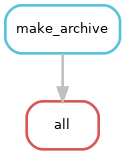

In [14]:
!snakemake -s pdb_code_2_intf_df_snakefile --dag | dot -Tpng > dag.png
from IPython.display import Image
Image("dag.png")

(For those wondering about the code in the cell above, the first line is snakemake making the image file making use of a helper program called `dot`, adpated from [here](https://github.com/ctb/2019-snakemake-ucdavis/blob/master/tutorial.md#outputting-the-entire-workflow-diagram). The other two lines are just some Python that can be used to display images in Jupyter cells.)

Interesting, it illustrates what snakemake presently wants to do. However, that graph isn't that exciting.  
**Let's see what we'd get if we had snakemake start over?** First, we'll tell it to use the clean rule using the following cell:

In [15]:
!snakemake -s pdb_code_2_intf_df_snakefile --cores 8 clean

Building DAG of jobs...
Using shell: /bin/bash
Provided cores: 8
Rules claiming more threads will be scaled down.
Job stats:
job      count    min threads    max threads
-----  -------  -------------  -------------
clean        1              1              1
total        1              1              1

Select jobs to execute...

[Wed Dec  8 19:29:32 2021]
rule clean:
    jobid: 0
    resources: tmpdir=/tmp

[Wed Dec  8 19:29:32 2021]
Finished job 0.
1 of 1 steps (100%) done
Complete log: /home/jovyan/notebooks/.snakemake/log/2021-12-08T192932.424173.snakemake.log


That rule was pointed out earlier as a way to reset things. This is a good example of taking advantage of that. To see the workflow diagram, **you could have also placed the next cell earlier in the notebook before actually running snakemake** so that you have a record of what is to follow. Feel free to use that feature in your own Jupyter notebooks using snakemake. It was left until last here because it is assumed snakemake woukd be unfamiliar to most people just looking to get interface records in a computation useable form.

Let's see the workflow diagram now that we have cleaned up to rest things:

Building DAG of jobs...


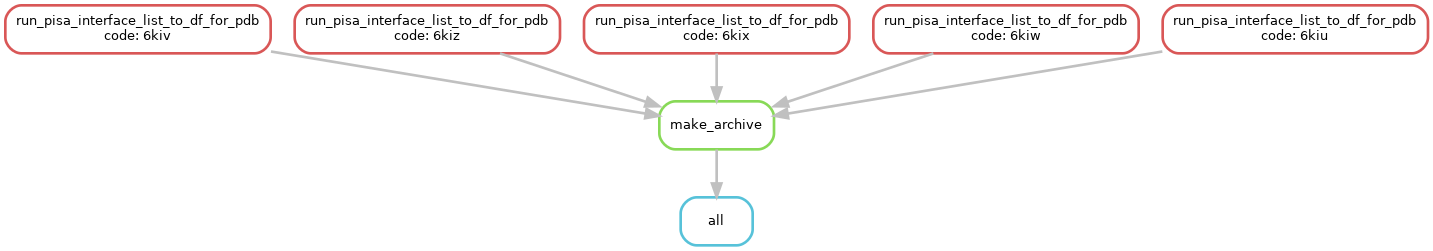

In [16]:
!snakemake -s pdb_code_2_intf_df_snakefile --dag | dot -Tpng > dag.png
from IPython.display import Image
Image("dag.png")

**Yes, that is our expanded workflow nicely visualized!**

If we instead reset and remade `interface_data_2_df_codes.txt` with just the original three PDB codes, it would only have those **original three** in the workflow digram.

Building DAG of jobs...
Using shell: /bin/bash
Provided cores: 8
Rules claiming more threads will be scaled down.
Job stats:
job      count    min threads    max threads
-----  -------  -------------  -------------
clean        1              1              1
total        1              1              1

Select jobs to execute...

[Wed Dec  8 19:29:34 2021]
rule clean:
    jobid: 0
    resources: tmpdir=/tmp

[Wed Dec  8 19:29:34 2021]
Finished job 0.
1 of 1 steps (100%) done
Complete log: /home/jovyan/notebooks/.snakemake/log/2021-12-08T192934.753053.snakemake.log
Writing 's' (str) to file 'interface_data_2_df_codes.txt'.
Building DAG of jobs...


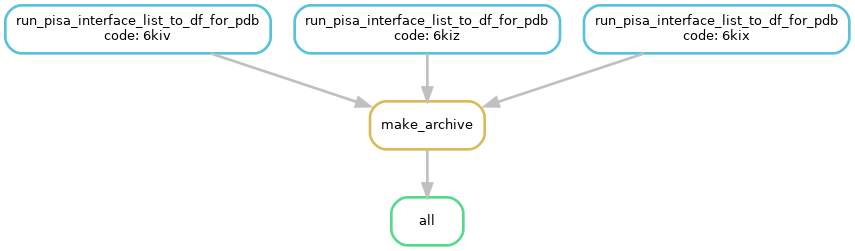

In [17]:
!snakemake -s pdb_code_2_intf_df_snakefile --cores 8 clean
s="6kiv\n6kiz\n6kix"
%store s >interface_data_2_df_codes.txt
!snakemake -s pdb_code_2_intf_df_snakefile --dag | dot -Tpng > dag.png
Image("dag.png")

With the ability to print the workflow diagram ahead of actually running things via the use of the dry run option, you could redo the steps we took for 'Example A. Add additional data' to add the other two PDB codes and then do a 'dry run' to see ahead of time that the rule `run_pisa_interface_list_to_df_for_pdb` will only processed the two added. (The reader can do that if they wish.) We originally had to look over the text logs after-the-fact to note this. The workflow diagram combined with the 'dry run' option makes following what will happen much more clear. 


------

Hopefully, the demonstration of a pretty straightforward and short wokflow has given you a sense of how to use Snakemake and an appreciation for how your work can benefit from the use of the workflow management software. There's other options for workflow management software that you make want to explore before going with Snakemake. [Nextflow](https://www.nextflow.io/) for common workflow language, Rabix and CWL airflow are the other popular alternatives for workflow management software for computational biology.  

If you wish to see a more detailed list of the features of Snakemake and why it is a good choice for work such as this [here](https://angus.readthedocs.io/en/2019/snakemake_for_automation.html#introduction-to-snakemake) and [here](https://github.com/ctb/2019-snakemake-ucdavis/blob/master/tutorial.md#thinking-about-workflows---a-stronger-argument).  

If you are curious to learn about using Snakemake to make your own workflows, I'd suggest Titus Brown's tutorials on this topic, such as [this one](https://angus.readthedocs.io/en/2019/snakemake_for_automation.html) and The Carpentries' [material on Snakemake](https://carpentries-incubator.github.io/workflows-snakemake/). The enviornment in which you are most likely currently viewing this notebook is all set up for working through The Carpentries' [material on Snakemake](https://carpentries-incubator.github.io/workflows-snakemake/). You can retrieve and extract the 'Lesson Data Files' accompanying the Carpentries' [material on Snakemake](https://carpentries-incubator.github.io/workflows-snakemake/) by running the following command in a Jupyter notebook cell:

```text
!curl -OL https://github.com/carpentries-incubator/workflows-snakemake/raw/gh-pages/files/workflow-engines-lesson.tar.gz
!tar xzf workflow-engines-lesson.tar.gz
```

(Leave off the exclamation point in the front of the two commands if you are looking to run them in a terminal. See [here](https://carpentries-incubator.github.io/workflows-snakemake/setup) for more on that.)

Titus Brown's tutorials link to active launchable sessions that run in RStudio, also served via MyBinder.org, that come complete with the necessary software and materials already installed or present.

----

In the next notebook in this series, [Making the multiple reports generated via snakemake clearer by adding protein names](Making%20the%20multiple%20reports%20generated%20via%20snakemake%20clearer%20by%20adding%20protein%20names.ipynb), I work through how to make the reports more human readable by swapping the chain designations with the actual names of the proteins. This is similar to making the report more human readable that was discussed at the bottom of the previous notebook, [Using PDBsum data to highlight changes in protein-protein interactions](Using%20PDBsum%20data%20to%20highlight%20changes%20in%20protein-protein%20interactions.ipynb); however, it will be done to all the notebooks at once based on the file name beginning with `interactions_report_for_` and ending with `.ipynb`.

-----

Please continue on with the next notebook in this series, [Making the multiple reports generated via snakemake clearer by adding protein names](Making%20the%20multiple%20reports%20generated%20via%20snakemake%20clearer%20by%20adding%20protein%20names.ipynb).

Or if you are interested in using PDBsum's interface statistics tables with Python or easily comparing those statistics for two structuress, see [Interface statistics basics & comparing Interface statistics for two structures](Interface%20statistics%20basics%20and%20comparing%20Interface%20statistics%20for%20two%20structures.ipynb).

-----